In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
infile = "ishworpoudyalTweets1.csv"
fileIn = open(infile,'r')
lines = fileIn.readlines()
date = list()
lang = list()
retweet = list()
retweet_count = list()
tweet = list()
for line in lines:
    try:
        lang.append(line.split("|")[1])
        date.append(line.split("|")[2].split(" "))
        retweet.append(line.split("|")[3])
        retweet_count.append(int(line.split("|")[4]))
        tweet.append(line.split("|")[5])
    except:
        print("Date in different format:")
        print(line)


Date in different format:
# tweet_id |language|time_created|Retweet_Flag|Retweet_count|tweet|



# Analysis of temporal distribution of tweet

In [3]:
dayInWeek = []
month = []
dayInMonth = []
time_hr = []
time_min = []
time_sec = []
year = []


In [4]:
for dateInfo in date[1:]:
    dayInWeek.append(dateInfo[0])
    month.append(dateInfo[1])
    dayInMonth.append(int(dateInfo[2]))
    time_hr.append(int(dateInfo[3].split(":")[0]))
    time_min.append(int(dateInfo[3].split(":")[1]))
    time_sec.append(int(dateInfo[3].split(":")[2]))
    year.append(int(dateInfo[5]))
            

In [5]:
def histogram(data):
    elements_ = list(set(data))
    histogram_ = {}
    for element in elements_:
        histogram_[element] = 0
        
        
        
    for element in data:
        histogram_[element] += 1
    return histogram_

In [6]:
histogram(dayInWeek)

{'Mon': 384,
 'Fri': 439,
 'Sun': 541,
 'Thu': 465,
 'Tue': 417,
 'Sat': 533,
 'Wed': 454}

In [7]:
histogram(month)

{'May': 311,
 'Jul': 287,
 'Mar': 314,
 'Apr': 338,
 'Oct': 201,
 'Dec': 279,
 'Jun': 221,
 'Jan': 339,
 'Nov': 296,
 'Aug': 164,
 'Feb': 335,
 'Sep': 148}

In [8]:
histogram(year)

{2016: 1021, 2017: 289, 2018: 260, 2019: 45, 2013: 300, 2014: 637, 2015: 681}

In [9]:
histogram(time_hr)

{0: 109,
 1: 195,
 2: 249,
 3: 349,
 4: 241,
 5: 179,
 6: 90,
 7: 24,
 8: 23,
 9: 21,
 10: 30,
 11: 63,
 12: 70,
 13: 187,
 14: 242,
 15: 244,
 16: 285,
 17: 178,
 18: 110,
 19: 49,
 20: 72,
 21: 79,
 22: 55,
 23: 89}

In [10]:
df = pd.DataFrame(list(zip(dayInMonth,dayInWeek,year, time_hr, time_min, \
                           time_sec,lang[1:],retweet[1:],retweet_count[1:])),\
                  columns=["dayMonth", "dayWeek", "year","HH","MM","SS",\
                           "Language","Retweet_Flag","Retweet_count"])

In [11]:
df.describe()

,dayMonth,year,HH,MM,SS,Retweet_count
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,16.054765,2015.409653,10.157488,29.740408,29.629022,301.542079
std,8.599938,1.421376,6.953995,17.663427,17.202242,7231.454472
min,1.000000,2013.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,2014.000000,3.000000,14.000000,15.000000,0.000000
50%,16.000000,2015.000000,12.000000,30.000000,30.000000,0.000000
75%,23.000000,2016.000000,16.000000,45.250000,44.000000,1.000000
max,31.000000,2019.000000,23.000000,59.000000,59.000000,384527.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3232 entries, 0 to 3231
Data columns (total 9 columns):
dayMonth         3232 non-null int64
dayWeek          3232 non-null object
year             3232 non-null int64
HH               3232 non-null int64
MM               3232 non-null int64
SS               3232 non-null int64
Language         3232 non-null object
Retweet_Flag     3232 non-null object
Retweet_count    3232 non-null int64
dtypes: int64(6), object(3)
memory usage: 227.3+ KB


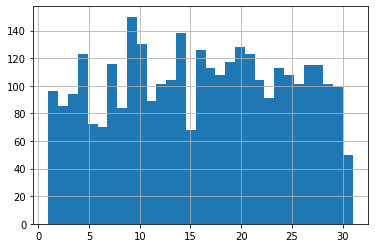

In [13]:
df.dayMonth.hist(bins=31)
plt.show()

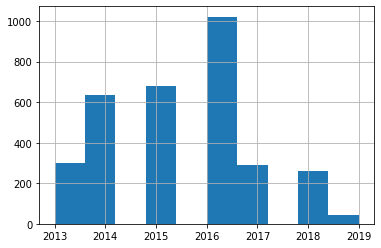

In [14]:
df.year.hist()

In [15]:
histogram(time_hr)

{0: 109,
 1: 195,
 2: 249,
 3: 349,
 4: 241,
 5: 179,
 6: 90,
 7: 24,
 8: 23,
 9: 21,
 10: 30,
 11: 63,
 12: 70,
 13: 187,
 14: 242,
 15: 244,
 16: 285,
 17: 178,
 18: 110,
 19: 49,
 20: 72,
 21: 79,
 22: 55,
 23: 89}

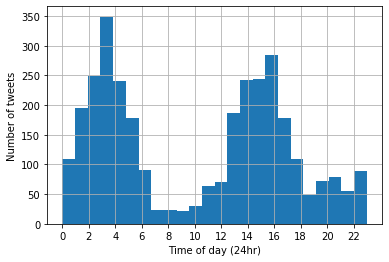

In [16]:
df.HH.hist(bins=24)
plt.xticks(range(0,24,2))
plt.xlabel("Time of day (24hr)")
plt.ylabel("Number of tweets")
plt.savefig("ishowr_time.pdf")
plt.show()


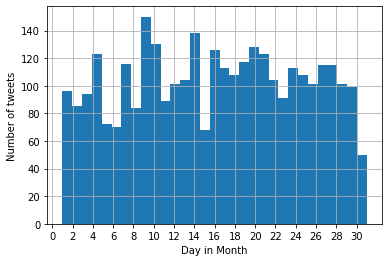

In [17]:
df.dayMonth.hist(bins=31)
plt.xticks(range(0,31,2))
plt.xlabel("Day in Month")
plt.ylabel("Number of tweets")
plt.savefig("ishwor_dayMonth.pdf")
plt.show()


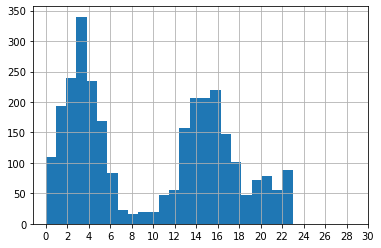

In [24]:
df[df.year>=2014].HH.hist(bins=24)
plt.xticks(range(0,31,2))
plt.show()

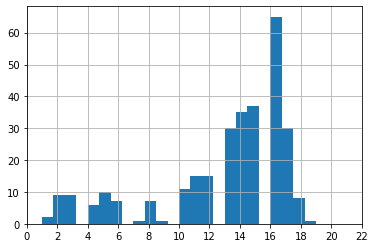

In [26]:
df[df.year<2014].HH.hist(bins=24)
plt.xticks(range(0,24,2))
plt.show()